# Example 6

# Conducting a Frequency-Dependent Equivalent Linear Elastic Analysis (FDM-EQL) with pyStrata

This example will showcase pyStrata's capabilities in conducting a frequency-dependent site response analysis on a suite of ground motions.

## Outputs
<p style="margin-left: 20px;">
• <b>Theoretical Transfer Function</b><br>
• <b>Response Spectra</b><br>
• <b>Predicted Surface Time Series</b> 
</p>

## Example Overview

1. <b>Generate a soil profile</b>   
   <span style="margin-left: 30px;">→ Utilize different soil models:</span>   
   <span style="margin-left: 50px;">- Classify soil properties via Darendili (2001)</span>
   <span style="margin-left: 30px;">- Classify soil properties via Wang (2022)?????????????</span>   
   <span style="margin-left: 30px;">→ Cap soil damping to 15%</span>   
   <span style="margin-left: 30px;">→ Scale D<sub>min</sub> to account for physical soil behaviour</span>




2. <b>Load in ground motions used for analysis</b>  

3. <b>Run FDM-EQL site response analysis</b>  
   <span style="margin-left: 40px;"><b>3.1</b> Illustrates the different options available in pystrata for calculating the strain spectrum </span>  
   <span style="margin-left: 60px;">→ Kausel, E., & Assimaki, D. (2002) ????????</span>  
   <span style="margin-left: 60px;">→ Zalachoris, G., & Rathje, E. (2015)</span>   
   <span style="margin-left: 60px;">→ Konno-Ohmachi smoothing method </span>

   <span style="margin-left: 40px;"><b>3.2</b> Discuss avaliable ouptuts:</span>     
   <span style="margin-left: 60px;">→ Maximum strain profile</span>   
   <span style="margin-left: 60px;">→ Damping spectra/profile</span>   
   <span style="margin-left: 60px;">→ Theoretical transfer functions</span>   
   <span style="margin-left: 60px;">→ Response spectra</span>   
   <span style="margin-left: 60px;">→ Theoretical surface motion</span>     
 

  
  
 

# Step 1: Generate a Soil Profile

pyStrata allows the user several different methods in which to classify the damping (D) and shear modulus (G) properties of a soil at varying strains. For example, the user can select the Darendeli model (2001) and the Wang model (2022) to estimate soil damping.   
   
   Below, the soil profile for the Kik-Net site KSRH09 will be analyzed.

## Darendeli (2001) Soil Profile

The characterize a Darendeli soil in pystrata, the following soil properties must be known (or assumed) for each layer in the relevant profile (Table 1):

<center>

**Table 1:** Darendeli (2001) Soil Property Input
| Soil Property         | Data Type  | Unit   | Default Value                      |
|-----------------------|------------|--------|------------------------------------|
| soil layer name       | str        | n/a    | optional                           |
| unit weight           | float      | kN/m³  | n/a                                |
| $\sigma_{mean}$       | float      | kN/m²  | 101.3                              |
| PI                    | float      | n/a    | 0                                  |
| OCR                   | float      | n/a    | 1                                  |
| excitation frequency  | float      | Hz     | 1                                  |
| number of cycles      | float      | n/a    | 10                                 |
| shear strain levels   | array_like | dec    | `np.logspace(-6, -1.5, num=20)`<br>(range: 1e-06 to 1e-1) |

</center>

The layer properties must also be defined in every single model. These include:

<center>

**Table 2:** Layer Property Input
| Soil Property         | Data Type  | Unit   | Default Value                      |
|-----------------------|------------|--------|------------------------------------|
| soil properties       | pyStrata SoilType        | n/a    | n/a                           |
| layer thickness       | float      | m | n/a                                |
| $V_s$                 | float      | m/s  | n/a                            |
| $D_{min}$             | float      | n/a    | `if None`, computes based on SoilType                                  |

</center>

An example pyStrata profile constructed using the Darendeli soil type:


In [1]:
import pystrata
profile = pystrata.site.Profile(
    [
        pystrata.site.Layer(pystrata.site.DarendeliSoilType(unit_wt=20.0, plas_index=15, ocr=1,stress_mean=40), 6, 90),
        pystrata.site.Layer(pystrata.site.DarendeliSoilType(unit_wt=20.0, plas_index=15, ocr=1,stress_mean=94), 4, 220),
        pystrata.site.Layer(pystrata.site.DarendeliSoilType(unit_wt=20.0, plas_index=15, ocr=1,stress_mean=209), 30, 440),
        pystrata.site.Layer(pystrata.site.DarendeliSoilType(unit_wt=20.0, plas_index=15, ocr=1,stress_mean=420), 32, 460),
        pystrata.site.Layer(pystrata.site.DarendeliSoilType(unit_wt=20.0, plas_index=15, ocr=1,stress_mean=634), 31, 530),
        pystrata.site.Layer(pystrata.site.SoilType("Rock", 20.0, None, 0.01), 0, 530),
    ]
)



One can easily visualize the $V_s$ profile via:

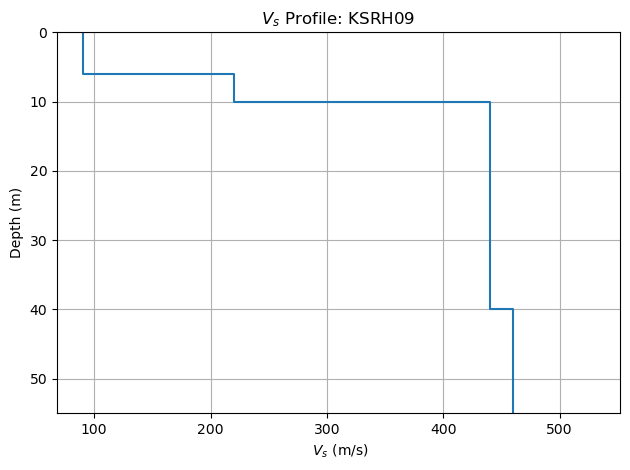

In [2]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(
    [layer.initial_shear_vel for layer in profile],
    [layer.depth for layer in profile],
    drawstyle="steps-pre",
)

ax.set(xlabel=" $V_s$ (m/s)", ylabel="Depth (m)", ylim=(55, 0),title='$V_s$ Profile: KSRH09')
ax.grid()
fig.tight_layout()

Or calculate $V_{s30}$ via:

In [3]:
vs_30 = profile.vs30()
print(f'Vs_30 for site KSRH09 is: {vs_30} m/s')

Vs_30 for site KSRH09 is: 230.23255813953486 m/s


## Adjusting $D_{min}$

Using a code in this package, it is straightforward to plot the modulus reduction and damping curves:

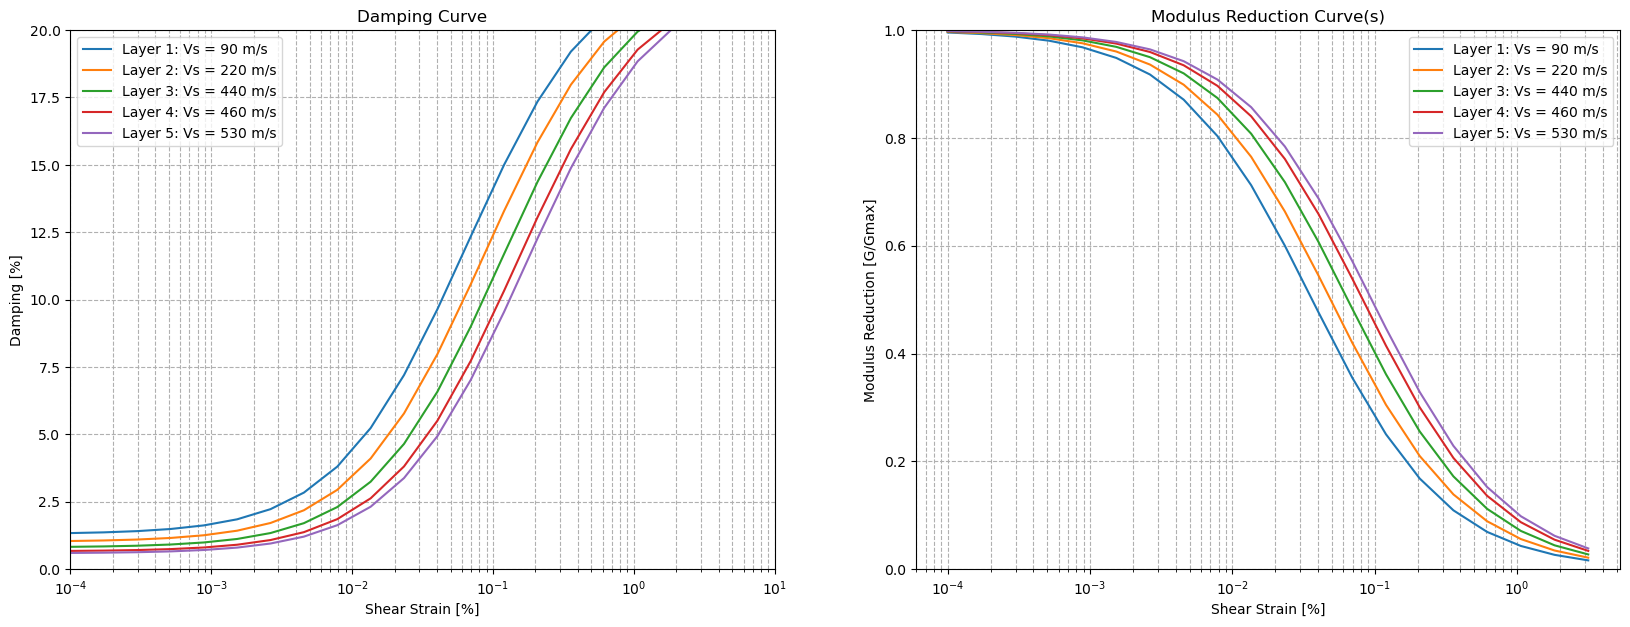

In [4]:
from datools.site_response_small import plot_damping_curve,plot_mrd_curve

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
plot_damping_curve(profile, ax=ax1)
plot_mrd_curve(profile, ax=ax2)

### Capping $D_{min}$

From above, the damping at high relative shear strains is unreasonable (i.e., not rooted in physical behaviour); therefore, it is necessary to cap the damping at 15%: 

Layer 1: Damping values capped at 15.0%.
Layer 2: Damping values capped at 15.0%.
Layer 3: Damping values capped at 15.0%.
Layer 4: Damping values capped at 15.0%.
Layer 5: Damping values capped at 15.0%.


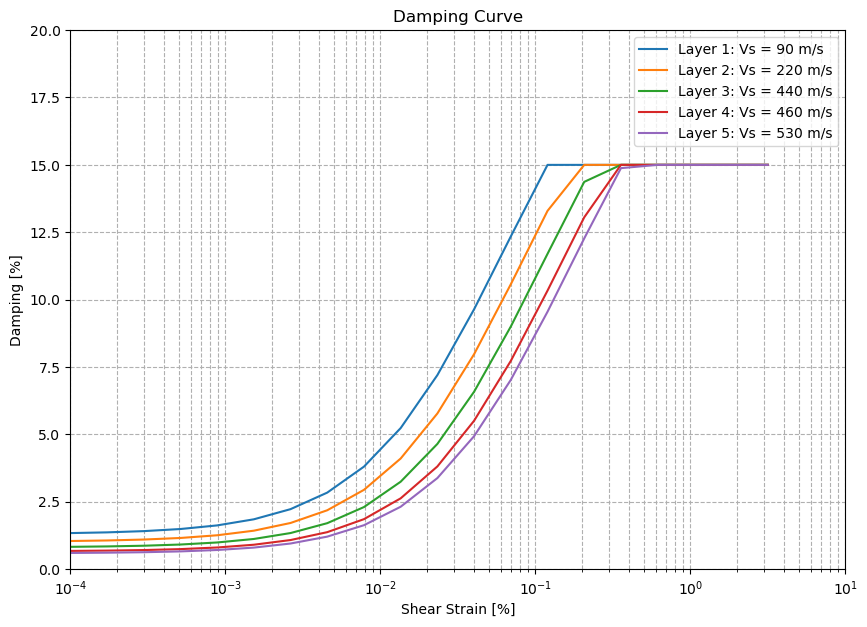

In [5]:
#function that caps all the damping values for each layer in constructed profil
from datools.site_response_small import cap_max_damping
profile = cap_max_damping(profile)
plot_damping_curve(profile)


### Adding a Scale Factor to $D_{min}$

In examples 3 and 4, ${\kappa}$ and ground motion parameter based $D_{min}$ scale factors were calculated.   

 This scale factor can then be applied to the minimum damping of each soil layer. The ${\kappa}$ scale factor for KSRH09 was found to be **10.14** in a previous analysis.

Layer 1: Damping values capped at 15.0%.
Layer 2: Damping values capped at 15.0%.
Layer 3: Damping values capped at 15.0%.
Layer 4: Damping values capped at 15.0%.
Layer 5: Damping values capped at 15.0%.


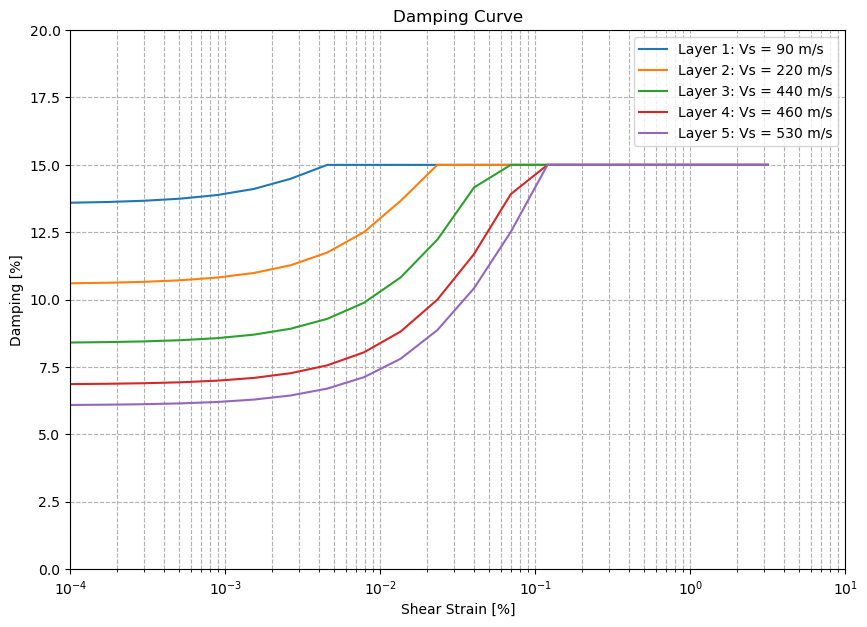

In [6]:
kappa_sf = 10.14

# -------------------
# calculated the Dmin values generated from the Darendeli soil profile and multiply by scale factor
# -------------------
unscaled_dmin = [layer.damping_min for layer in profile.layers]

scaled_dmin = [dmin * kappa_sf for dmin in unscaled_dmin]

# -------------------
# Create new soil properties based off of scaled Dmin
# -------------------

soil_1 = pystrata.site.DarendeliSoilType(unit_wt=20.0, plas_index=15, 
                                         ocr=1,stress_mean=40,damping_min = scaled_dmin[0])

soil_2 = pystrata.site.DarendeliSoilType(unit_wt=20.0, plas_index=15,
                                          ocr=1,stress_mean=94, damping_min=scaled_dmin[1])
                   
soil_3 = pystrata.site.DarendeliSoilType(unit_wt=20.0, plas_index=15,
                                          ocr=1,stress_mean=209, damping_min = scaled_dmin[2]) 

soil_4 = pystrata.site.DarendeliSoilType(unit_wt=20.0, plas_index=15, ocr=1,
                                         stress_mean=420, damping_min =scaled_dmin[3])

soil_5 = pystrata.site.DarendeliSoilType(unit_wt=20.0, plas_index=15,
                                          ocr=1,stress_mean=634, damping_min = scaled_dmin[4])

soil_6 = pystrata.site.SoilType("Rock", 20.0, None, 0.1)

# -------------------
# Construct new pyStrata profile object
# -------------------

profile_adjusted = pystrata.site.Profile(
    [
        pystrata.site.Layer(soil_1, 6, 90),
        pystrata.site.Layer(soil_2, 4, 220),
        pystrata.site.Layer(soil_3, 30, 440),
        pystrata.site.Layer(soil_4, 32, 460),
        pystrata.site.Layer(soil_5, 31, 530),
        pystrata.site.Layer(soil_6, 0, 530),
    ]
)


# -------------------
# Plotting the Damping Curves for new Profile
# -------------------

profile_adjusted = cap_max_damping(profile_adjusted) #limiting damping to 15%
plot_damping_curve(profile_adjusted)


# Step 2: Load in Ground Motion(s) for Analysis

The last step included information exclusively related to setting up the site profile. The remainder of the example will use the *unscaled* Darendeli $D_{min}$ values for the soil damping profile.   

 Now, to conduct a frequency-dependent analysis, it is necessary to have at least one input motion.  
    
This example will use a single processed large-strain motion from the site KSRH09. Everything can be scaled up if the user intends to analyze several motions at once.
  

Total traces combined: 1
Total traces combined: 1


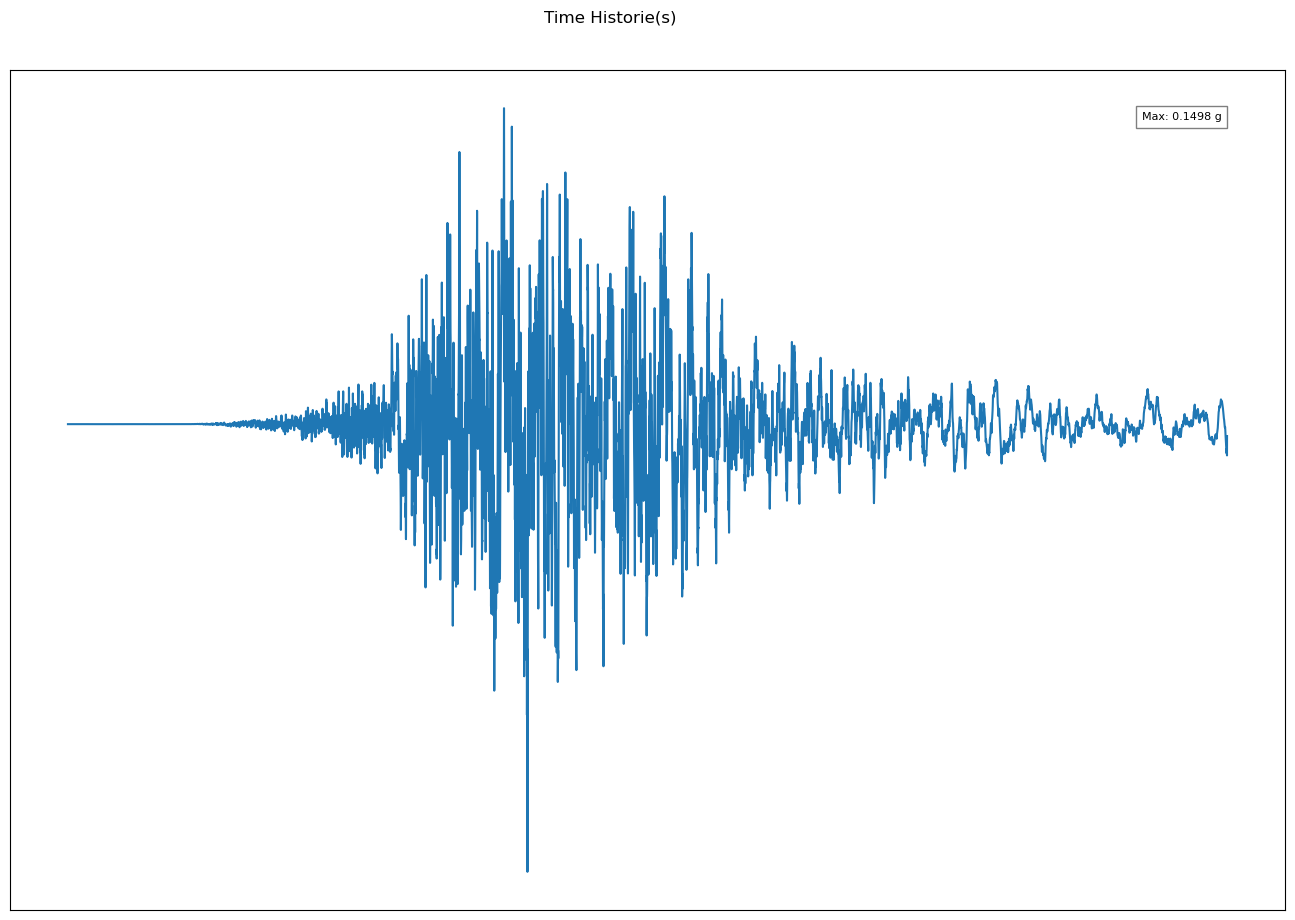

In [7]:
# -------------------
# Create Obspy stream from MSEED file
# -------------------

from datools import signal_processing, site_response_small
base_stream = signal_processing.genstream("data/Example_6/base","MSEED")
surf_stream = signal_processing.genstream("data/Example_6/surface","MSEED")

# -------------------
# Convert Obspy Stream Object into pyStrata motion (see Example 2 for more information object definitions)
# -------------------

base_motion = site_response_small.convert_to_motion(base_stream,'EW1')
surf_motion = site_response_small.convert_to_motion(surf_stream,'Ew2')

# --------------------
# Plot the base motion
# --------------------


#This is the minimal plotting function, for full detail use 'plotstream()'
signal_processing.plotstream_minimal(base_stream)


# Step 3: Perform FDM-EQL Analysis

## Introduction

FDM-EQL analyses were created to address the limitations of EQl analysis at large strains. The intent is to calculate a shear strain frequency spectrum that is then used to specify strain-compatible properties at each frequency. The figure below portrays this process.  

In pyStrata, FDM-EQL is an iterative process that begins with the strains calculated via an EQL analysis for initial strain estimates. The program then iterates with multiple different strain transfer functions, updating nonlinear soil properties, until convergence is reached.
   
There are several ways in which to process or use the strain-frequency spectrum in FDM-EQL analysis. These different methods will be explained in further detail in the following sections. 



Zalachoris (2014)


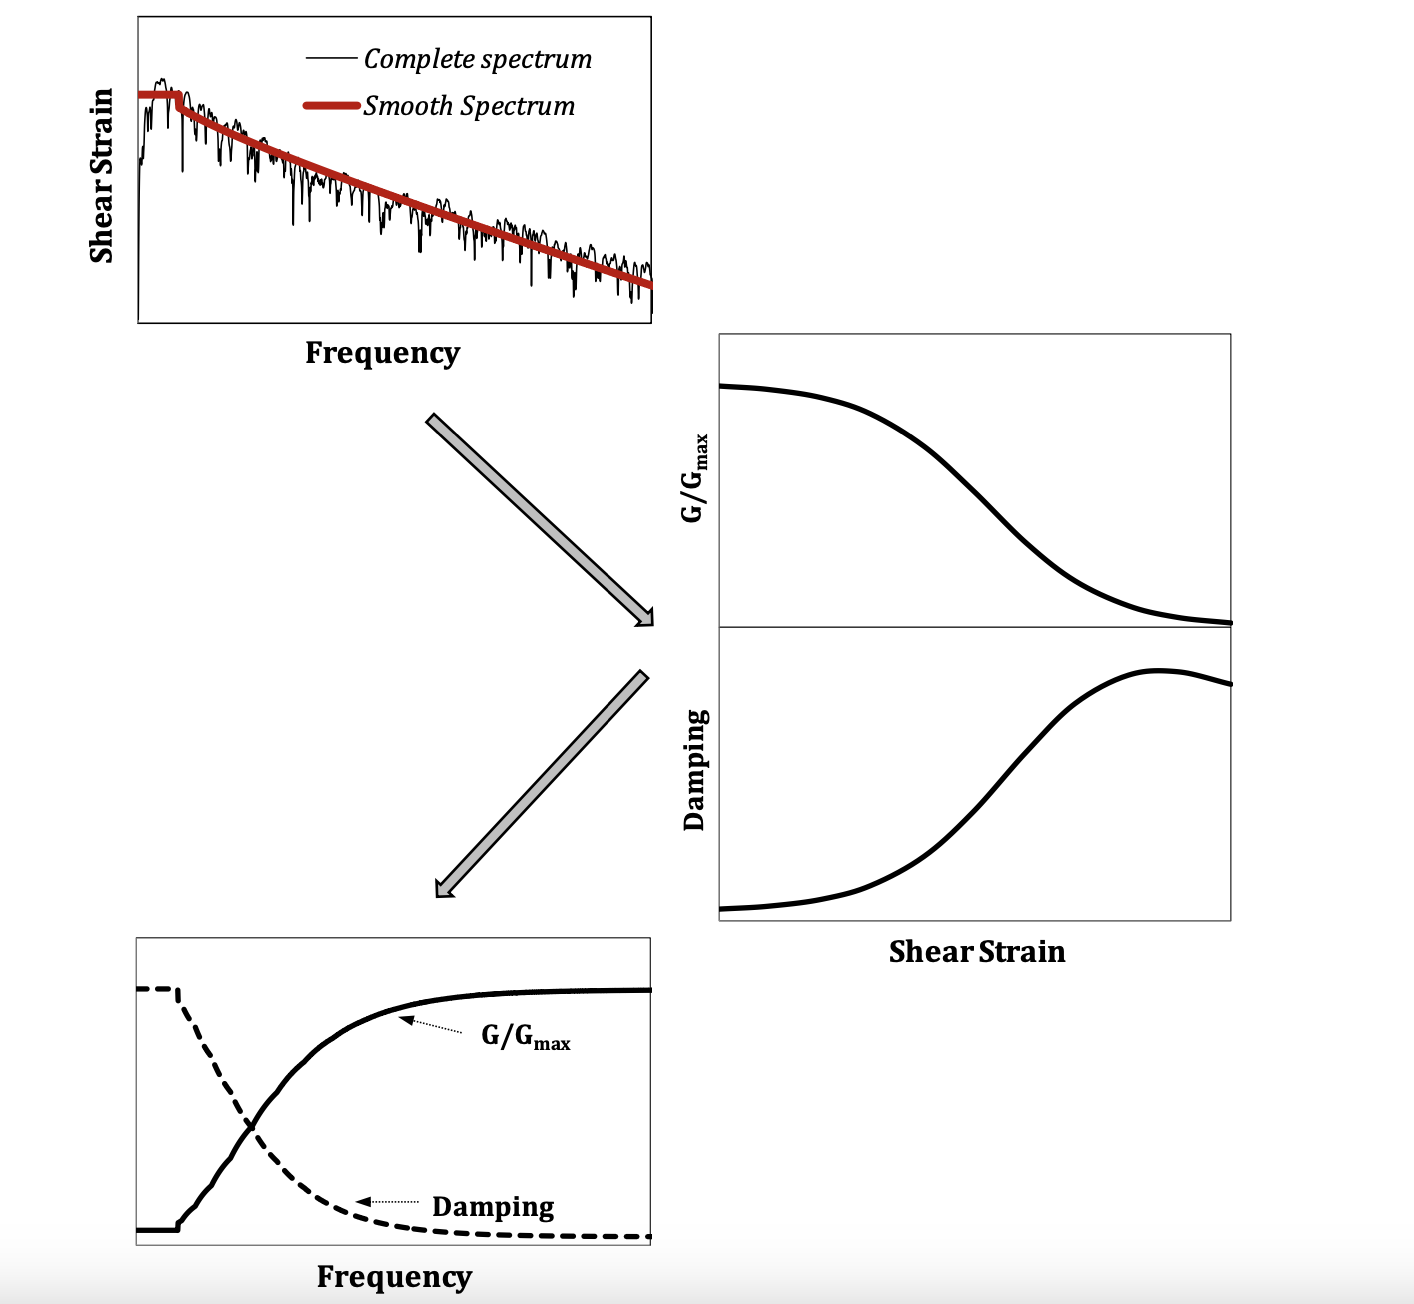

In [8]:
from IPython.display import Image
print("Zalachoris (2014)")
Image(filename='data/Example_6/image_1.png')


## Step 3.1: Different Methods for Calculating the Strain Spectrum

## Zalachoris & Rathje (2014)



This approach utilizes the entire strain frequency spectrum (as opposed to Kausel & Assimaki). It effectively uses the following procedure:


### 1. Calculate the Strain FAS from each layer

The strain Fourier Amplitude Spectrum (FAS) at the surface is computed as:

$$
\frac{\text{FAS}_{\gamma-\text{layer-surface}}}{\text{FAS}_{\text{acceleration-base}}} \times \text{FAS}_{\gamma-\text{base}} = \text{FAS}_{\gamma-\text{layer-surface}}
$$

where:
- $\text{FAS}_{\gamma-\text{surface}}$ = Strain FAS at surface
- $\text{FAS}_{\text{acceleration-base}}$ = Acceleration FAS at base
- $\text{FAS}_{\gamma-\text{base}}$ = Strain FAS at base

### 2. Find the maximum strain in the time domain

$$
\gamma_{eff} = \gamma(t)_{max} * \text{effective strain ratio}
$$

where:

- effective strain ratio = 1 (usually 0.65 in EQL)

### 3. Normalize the strain FAS

The frequency-dependent strain is then calculated as:

$$
\gamma(f) = \left[ \frac{(\text{FAS}_{\gamma-\text{surface}})}{(\text{FAS}_{\gamma-\text{surface}})_{\text{max}}} \right] \times \gamma_{\text{eff}}
$$


## Konno-Ohmachi Smoothing

This method was developed by Dr. Albert Kottke for pyStrata. The process is generally quite similar when compared to the Zalachoris & Rathje (2014) model. However, instead of using the entire strain frequency spectra, this method apples a monotonic Konno-Ohmachi filter:


### 1. Calculate the Strain FAS from each layer   
(same as before)

### 2. Smooth the strain spectrum for each layer with a Konno-Ohmachi filter (optimal bandwidth is still uncertain)

### 3. Find the maximum strain in the time domain (after smoothing)
$$
\gamma_{eff} = \gamma(t)_{smoothed,max} * \text{effective strain ratio}
$$

where:

- effective strain ratio = 1 (usually 0.65 in EQL)

### 4. Normalize the strain FAS
$$
\gamma(f) = \left[ \frac{(\text{FAS}_{\gamma-\text{surface}})_{\text{smoothed}}}{(\text{FAS}_{\gamma-\text{surface}})_{\text{smoothed,max}}} \right] \times \gamma_{\text{eff}}
$$

### 5. Moving **High to Low** frequency-wise, monotonically increase alongside the smoothed Strain FAS.


## Comparisons

The function below offers comparisons from the EQL, Zalachoris & Rathje (ZR), and "Konno-Ohmachi" (with a bandwidth of 20) methods for handling the strain frequency spectra (given a ground motion and profile):

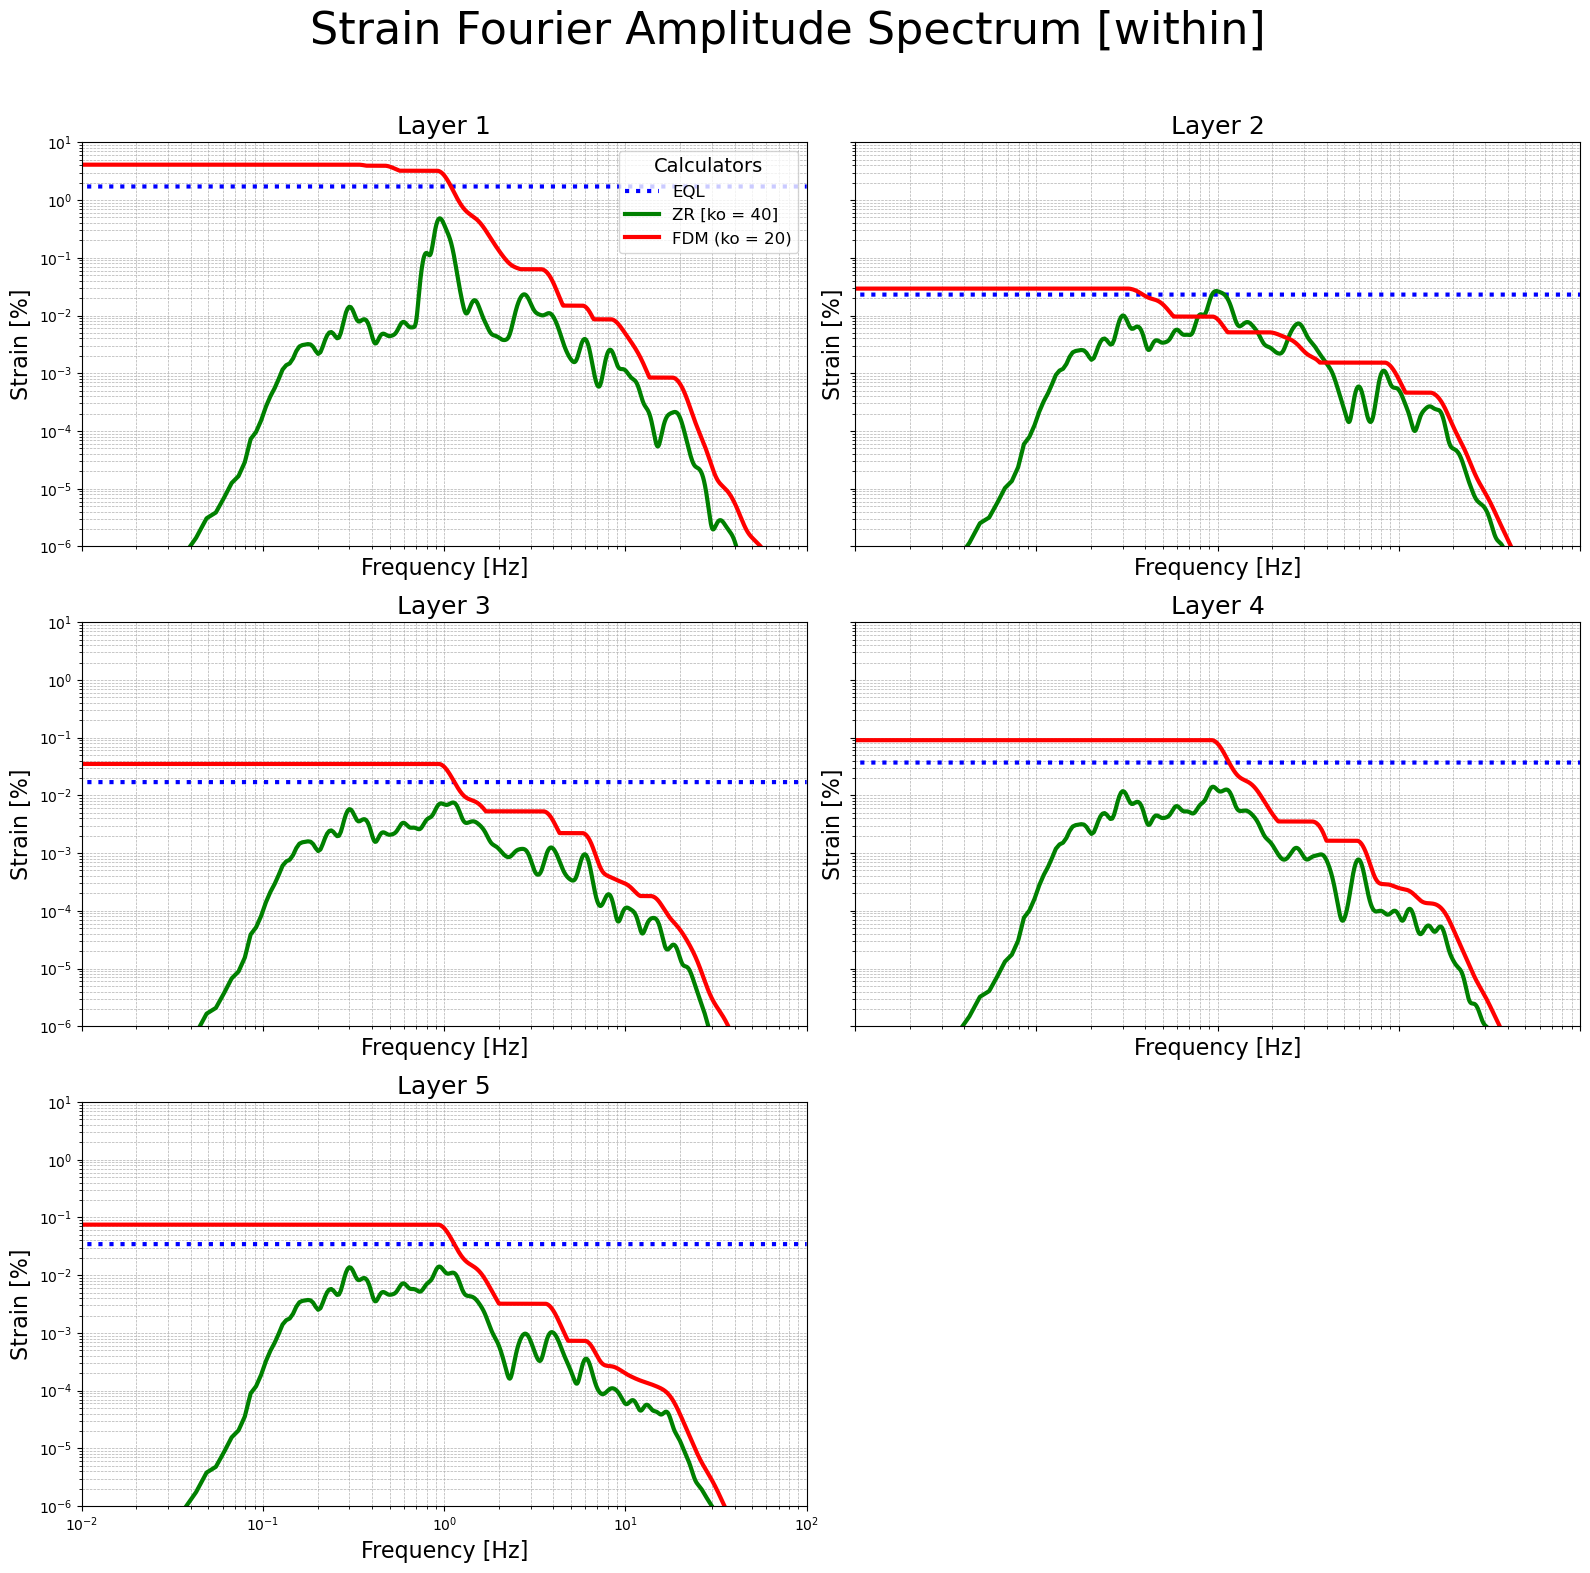

In [10]:
site_response_small.strain_levels_fdm_simple(base_motion[0],profile)

# 3.2 FDM-EQL Site Response Outputs

Besides the differing strain frequency response spectra calculation methods, FDM-EQL analysis works analogous to EQL functionality-wise in pyStrata. The interesting part of the analysis, is...the freqeucny dependent bit.   
   
The structure for the output code is just like in Example 2:

In [20]:
import numpy as np
freqs = np.logspace(-1, np.log10(50.0), num=500)

outputs = pystrata.output.OutputCollection(
    [
        pystrata.output.ResponseSpectrumOutput(
            # Frequency
            freqs,
            # Location of the output
            pystrata.output.OutputLocation("outcrop", index=0),
            # Damping
            0.05,
        ),
        pystrata.output.ResponseSpectrumRatioOutput(
            # Frequency
            freqs,
            # Location in (denominator),
            pystrata.output.OutputLocation("outcrop", index=-1),
            # Location out (numerator)
            pystrata.output.OutputLocation("outcrop", index=0),
            # Damping
            0.05,
        ),
        pystrata.output.AccelTransferFunctionOutput(
            # Frequency
            freqs,
            # Location in (denominator),
            pystrata.output.OutputLocation("outcrop", index=-1),
            # Location out (numerator)
            pystrata.output.OutputLocation("outcrop", index=0),
        ),
        pystrata.output.AccelTransferFunctionOutput(
            # Frequency
            freqs,
            # Location in (denominator),
            pystrata.output.OutputLocation("outcrop", index=-1),
            # Location out (numerator)
            pystrata.output.OutputLocation("outcrop", index=0),
            ko_bandwidth=30,
        ),
    ]
)

But the nonlinear soil properties change not only for each induced strain, but now alsohave strains that change at each frequency:

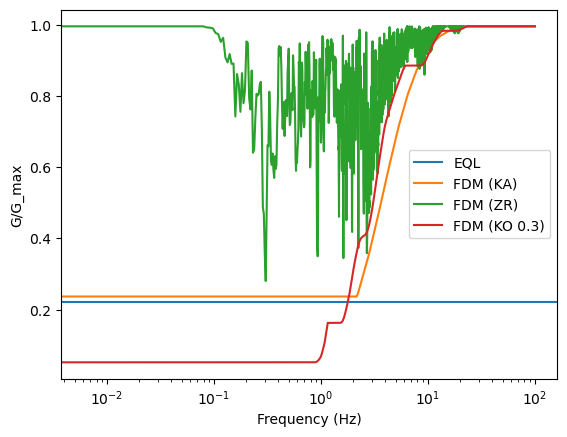

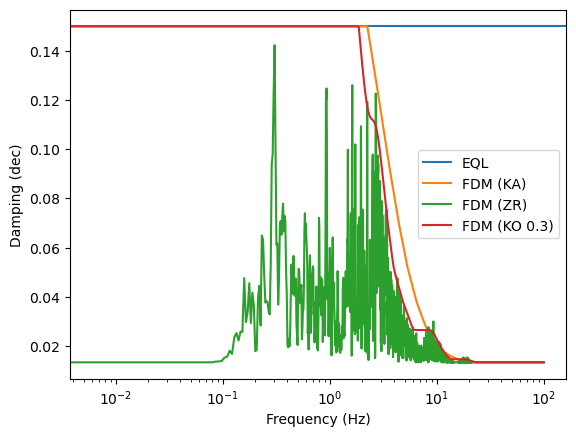

In [21]:
ts = base_motion[0]
calcs = [
    ("EQL", pystrata.propagation.EquivalentLinearCalculator()),
    (
        "FDM (KA)",
        pystrata.propagation.FrequencyDependentEqlCalculator(strain_ratio=0.65, method='ka02'),
    ),
    (
        "FDM (ZR)",
        pystrata.propagation.FrequencyDependentEqlCalculator(method='zr15'),
    ),
    (
        "FDM (KO 0.3)",
        pystrata.propagation.FrequencyDependentEqlCalculator(method='ko:20'),
    ),
]

properties = {}
for name, calc in calcs:
    calc(ts, profile, profile.location("outcrop", index=-1))
    outputs(calc, name)

    properties[name] = {
        key: getattr(profile[0], key) for key in ["shear_mod_reduc", "damping"]
    }



for key in properties["EQL"].keys():
    fig, ax = plt.subplots()

    for i, (k, p) in enumerate(properties.items()):
        if k == "EQL":
            ax.axhline(p[key], label=k, color=f"C{i}")
        else:
            ax.plot(ts.freqs, p[key], label=k, color=f"C{i}")

    ax.set(
        ylabel={"damping": "Damping (dec)", "shear_mod_reduc": "G/G_max"}[key],
        xlabel="Frequency (Hz)",
        xscale="log",
    )
    ax.legend()
     

The other standard outputs you would get from a site response analysis:

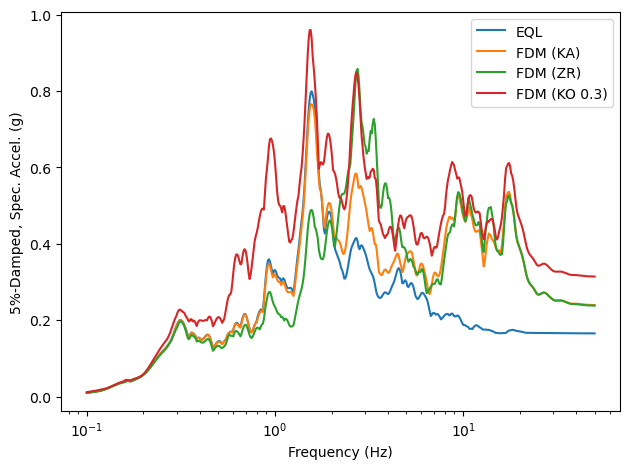

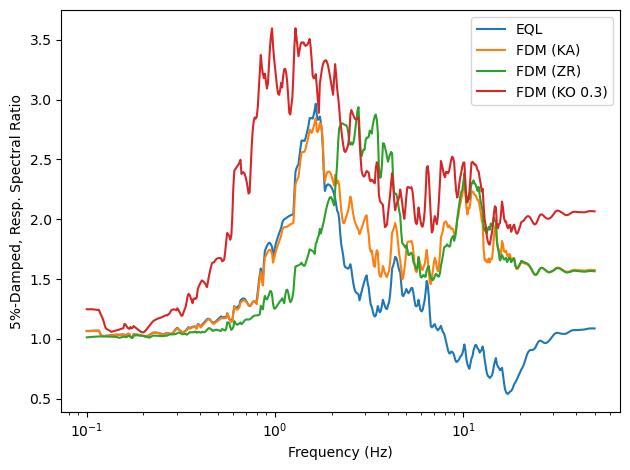

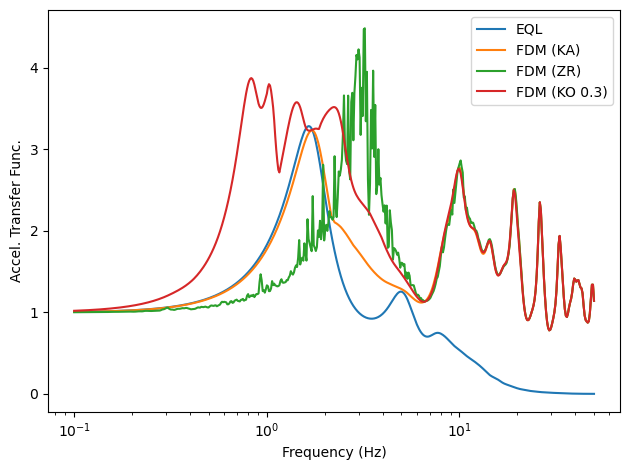

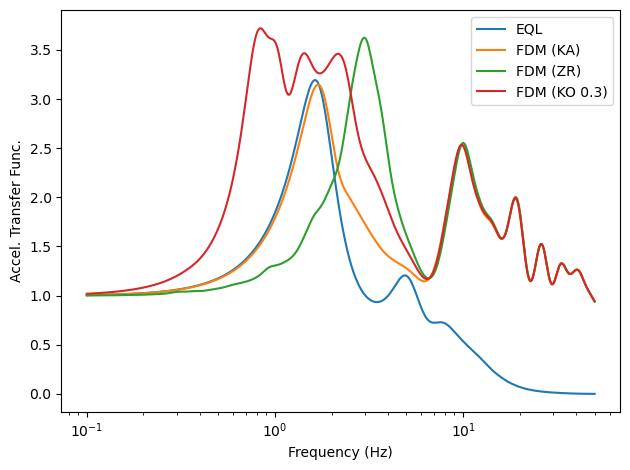

In [22]:
for output in outputs:
    fig, ax = plt.subplots()
    for name, refs, values in output.iter_results():
        ax.plot(refs, values, label=name)

    ax.set(xlabel=output.xlabel, xscale="log", ylabel=output.ylabel)
    ax.legend()
    fig.tight_layout()
     
